In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('ds_salaries.csv', header=0, delimiter=',', encoding='utf-8')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


Z-TEST

1. Thực hiện kiểm định trung bình của 1 biến số (định lượng) bằng phương pháp
Z-Test bằng một giá trị nào đó với mức sai lầm là 5%. Cho nhận xét

In [4]:
df['salary'].loc[df['employee_residence'] == 'US'].mean()

152822.01165113182

In [5]:
from statsmodels.stats.weightstats import ztest as ztest
# Hãy kiểm tra xem trung bình salary của nhân viên có nơi ở là US có bằng 152000 hay không với mức sai lầm 5%
# H0: u = 8.0
# H1: u != 8.0
# alpha = 0.05
# Tính toán giá trị p-value
# Nếu p-value < alpha => bác bỏ H0
# Nếu p-value >= alpha => không đủ cơ sở để bác bỏ H0
dfresidence = df.loc[df['employee_residence'] == 'US']
ztest(dfresidence['salary'], value=152000)
# Nhận xét salary trung bình của nhân viên có nơi ở là US bằng 152000 vì p-value = 0.0.41573919325997 > alpha = 0.05

(0.8138355031402762, 0.41573919325997)

2. Thực hiện kiểm định trung bình của 2 biến số (định lượng) bằng phương pháp
Z-Test có bằng nhau không với mức sai lầm là 5%. Cho nhận xét

In [37]:
dfresidence = df.loc[df['employee_residence'] == 'US']
ztest(dfresidence['salary'], dfresidence['salary_in_usd'],value=0)
# Kết luận: chấp nhận H0 vì p-value = 1.0 > alpha = 0.05

(0.0, 1.0)

T-TEST

3. TWO SAMPLE T-TEST: Thực hiện kiểm định trung bình của 2 biến số (định lượng) có bằng nhau không
bằng phương pháp T-Test với mức sai lầm là 10%. Cho nhận xét

In [38]:
import scipy.stats as stats
# Hãy kiểm tra xem trung bình salary của nhân viên có nơi ở là US có bằng trung bình salary_in_usd của nhân viên có nơi ở là US
#  hay không với mức sai lầm 10%
# alpha = 0.1
# Tính toán giá trị p-value
dfresidence = df.loc[df['employee_residence'] == 'US'].head(29)
stats.ttest_ind(dfresidence['salary'],dfresidence['salary_in_usd'],equal_var=True)

# Kết luận: do alpha = 0.1 < p-value = 1.0 => chấp nhận H0 ở mức sai lầm 10% 
# => trung bình salary của nhân viên có nơi ở là US bằng trung bình salary_in_usd của nhân viên có nơi ở là US


TtestResult(statistic=0.0, pvalue=1.0, df=56.0)

4. ONE SAMPLE T-TEST: Kiểm định trung bình của 1 biến số (định lượng) có bằng một giá trị nào đó

In [40]:
# xem trung bình salary của nhân viên có nơi ở là US có bằng 144000 hay không với mức sai lầm 5%
dfresidence = df.loc[df['employee_residence'] == 'US'].head(29)
stats.ttest_1samp(dfresidence['salary'],popmean=144000)

# Kết luận: Chấp nhận H0 do p-value = 0.7470992057602965 > alpha = 0.05

TtestResult(statistic=0.32566490644808316, pvalue=0.7470992057602965, df=28)

5. Thực hiện kiểm tra 2 biến định lượng có tương quan với nhau không bằng
phương pháp Chi-Square với mức sai lầm là 5%? Cho nhận xét.

In [7]:
from scipy.stats import chi2_contingency

In [8]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [9]:
# Hãy kiểm tra xem có sự phụ thuôc nào giữa mức độ kinh nghiệm và nơi ở của nhân viên hay không
crosdata = pd.crosstab(df['experience_level'],[df['employee_residence']],rownames=['experience_level'],colnames=['employee_residence'])
crosdata

employee_residence,AE,AM,AR,AS,AT,AU,BA,BE,BG,BO,...,SG,SI,SK,TH,TN,TR,UA,US,UZ,VN
experience_level,,,,,,,,,,,,,,,,,,,,,
EN,0,0,4,1,1,4,1,3,0,0,...,1,0,0,1,1,0,1,173,1,1
EX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,97,1,0
MI,1,1,0,1,4,5,0,1,0,3,...,4,3,0,1,0,4,0,481,0,1
SE,2,0,2,0,1,2,0,1,1,0,...,0,1,1,1,0,1,3,2253,0,1


In [10]:
stat, p, dof, excepted = chi2_contingency(crosdata)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print ('Dependent (Reject H0)')
else:
    print ('Independent (H0 holds true)')
# Có quan hệ giữa mức độ kinh nghiệm và nơi ở của nhân viên
# Kết luận: p-value = 1.5794763084245592e-124 < alpha = 0.05
# Tức là: không đủ dữ liệu để nói rằng mức độ kinh nghiệm và nơi ở của nhân viên là độc lập hay có sự quan hệ giữa mức độ kinh nghiệm và nơi ở của nhân viên

p value is 1.5794763084245592e-124
Dependent (Reject H0)


6. Kiểm định tương quan giữa 2 biến định lượng

In [20]:
from scipy.stats.stats import pearsonr

C:\Users\Admin\AppData\Local\Temp\ipykernel_17780\4005289447.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


<Axes: >

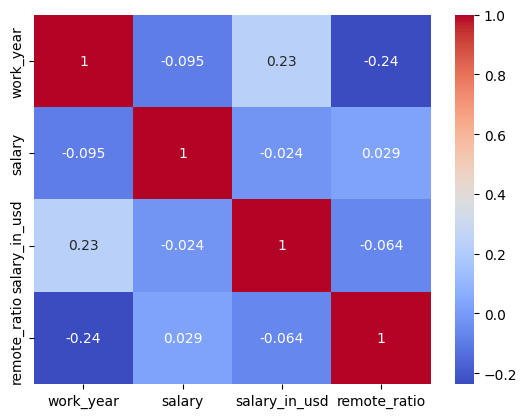

In [28]:
dfheatmap = df.select_dtypes(exclude=['object'])
sns.heatmap(dfheatmap.corr(), annot=True, cmap='coolwarm')

# dfheatmap = df.drop
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


In [30]:
# Kiểm tra xem work_year và salary_in_usd có tương quan với nhau hay không
pearsonr(df['work_year'],df['salary_in_usd'])
# Bác bỏ H0: r= 0 do pvalue = 1.3645442467736591e-45 < alpha = 0.05 => r =! 0 => 2 biến không tương quan 
# kết luận: mức độ tương quan thấp (0.22829002243287827)

PearsonRResult(statistic=0.22829002243287827, pvalue=1.3645442467736591e-45)